# Tabla de pruebas

$$ -\Delta(x,y) = [R_{2}^{2} - |\xi_{-}|^{2}]^{1/2} + [R_{1}^{2} - |\xi_{+}|^{2}]^{1/2} - [R_{1}^{2} - |\xi_{-}|^{2}]^{1/2} - [R_{2}^{2} - |\xi_{+}|^{2}]^{1/2} $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
%matplotlib widget

In [2]:
def matrix_points(p):
    #x son los puntos sobre el eje x
    x = list(np.array(p)[:,0])
    y = list(np.array(p)[:,1])
    
    #subm_1 es la submatriz compuesta de vectores fila de x
    subm_1x = np.array(x*len(x)).reshape(len(x),len(x))
    subm_1y = np.array(y*len(y)).reshape(len(y),len(y))
    
    #subm_2 es la submatriz compuesta de vectores columna repitiendo x
    subm_2x = np.transpose(subm_1x)
    subm_2y = np.transpose(subm_1y)
    
    #xi_a es el promedio de cada punto en x con cada uno de los demas puntos
    xi_a = (subm_1x+subm_2x)/2
    eta_a = (subm_1y+subm_2y)/2
    
    #xi_d es la distancia de cada punto con cada uno de los demas puntos
    xi_d = subm_2x-subm_1x
    eta_d = subm_2y-subm_1y
    
    #vectores de las matrices xi_a y xi_d
    xi_av = list(xi_a.reshape(1,len(xi_a)**2))
    xi_dv = list(xi_d.reshape(1,len(xi_d)**2))
    eta_av = list(eta_a.reshape(1,len(eta_a)**2))
    eta_dv = list(eta_d.reshape(1,len(eta_d)**2))
    
    #matriz con todas las parejas de puntos xi_a y xi_d
    xi_m = np.transpose(np.array(xi_av+xi_dv+eta_av+eta_dv)).reshape(len(x),len(x),4)
    return xi_m

In [3]:
def GeometricPotencial_3D_00_reducido(xa, xi_a, xi_d, ya, eta_a, eta_d, za, wa, c, R1, R2):
    #constantes
    pic = 1 / ((4*np.pi) ** 2)
    k = ((2*np.pi)/wa)
    
    xi_p, xi_n = xi_a+(xi_d)/2, xi_a-(xi_d)/2
    eta_p, eta_n = eta_a+(eta_d)/2, eta_a-(eta_d)/2
    
    R1 = R1*w
    R2 = R2*w
    phase_plus  = -np.sqrt((R1**2) - (xi_p**2) - (eta_p**2) ) + np.sqrt((R2**2) - (xi_p**2) - (eta_p**2) ) + R1 + R2
    phase_minus = np.sqrt((R2**2) - (xi_n**2) - (eta_n**2) ) - np.sqrt((R1**2) - (xi_n**2) - (eta_n**2) ) + R1 + R2
    phase = np.exp(-1j*k*phase_plus*c) * np.exp(1j*k*phase_minus*c)
    
    #distancia s
    s_1 = np.sqrt(((xa-xi_p) ** 2) + ((ya-eta_p) **2) + ((za) ** 2))
    s_2 = np.sqrt(((xa-xi_n) **2) + ((ya-eta_n) ** 2) + ((za) ** 2))
    
    #kernel
    kernel_0 = 2*((k**2)*pic) * ((za+s_1)/(s_1 ** 2)) * ((za+s_2)/(s_2 ** 2)) * np.exp(1j*k*s_1-1j*k*s_2) * phase 
    kernel = np.real(kernel_0)
    #print(phase)
    return kernel

def GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2):
    sum_r = 0
    matrix_complete = matrix_points(p)
    matrix_real = np.einsum('iij->ij', matrix_complete)
    for i in matrix_real:
        sum_r = sum_r + GeometricPotencial_3D_00_reducido(xa,i[0],i[1],ya,i[2],i[3],za,wa,c,R1,R2)
    return sum_r

def GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2):
    sum_v = 0
    matrix_complete = matrix_points(p)
    matrix_virtual = []
    
    for i in range(0,len(matrix_complete)):
        for j in range(0,len(matrix_complete)):
            if i != j:
                matrix_virtual.append(list(matrix_complete[i,j]))
    
    matrix_virtual = np.array(matrix_virtual)
    
    for k in matrix_virtual:
        sum_v = sum_v + GeometricPotencial_3D_00_reducido(xa,k[0],k[1],ya,k[2],k[3],za,wa,c,R1,R2)
    return sum_v

def GeometricPotencial_3D_reducido(xa, ya, za, p, wa,c,R1,R2):
    sum_t = 1*GeometricPotencial_3D_Real(xa, ya, za, p, wa,c,R1,R2) + 1*GeometricPotencial_3D_Virtual(xa, ya, za, p, wa,c,R1,R2)
    return sum_t

| # de puntos | Distancia entre puntos| $R_{1}$ | $R_{2}$   |$\lambda$|
|:-----------:|:---------------------:|:-------:|:---------:|:-------:|
|:-----------:|:---------------------:|:-------:|:---------:|:-------:|
| 4           | 0.1                   | 5       | -5        |400      |
| 4           | 0.1                   | 5       | -5        |400      |
| 4           | 0.2                   | 5       | -5        |400      |
| 4           | 0.3                   | 5       | -5        |400      |
| 4           | 0.5                   | 5       | -5        |400      |
| 4           | 0.6                   | 5       | -5        |400      |
| 4           | 0.7                   | 5       | -5        |400      |
| 4           | 0.8                   | 5       | -5        |400      |
| 4           | 0.9                   | 5       | -5        |400      |

# Parametros de la simulación

In [4]:
w      = 400 * (10 ** -9)
r1     = 5
r2     = -5
a      = .1 * w
points = np.array([[-a,-a],[-a,a],[a,a],[a,-a],[a,0],[-a,0],[0,a],[0,-a],[0,0]])
paraxial_aprox = (((1/r1) - (1/r2)) * (1/w)) ** -1
print(paraxial_aprox), np.sqrt(12)

1e-06


(None, 3.4641016151377544)

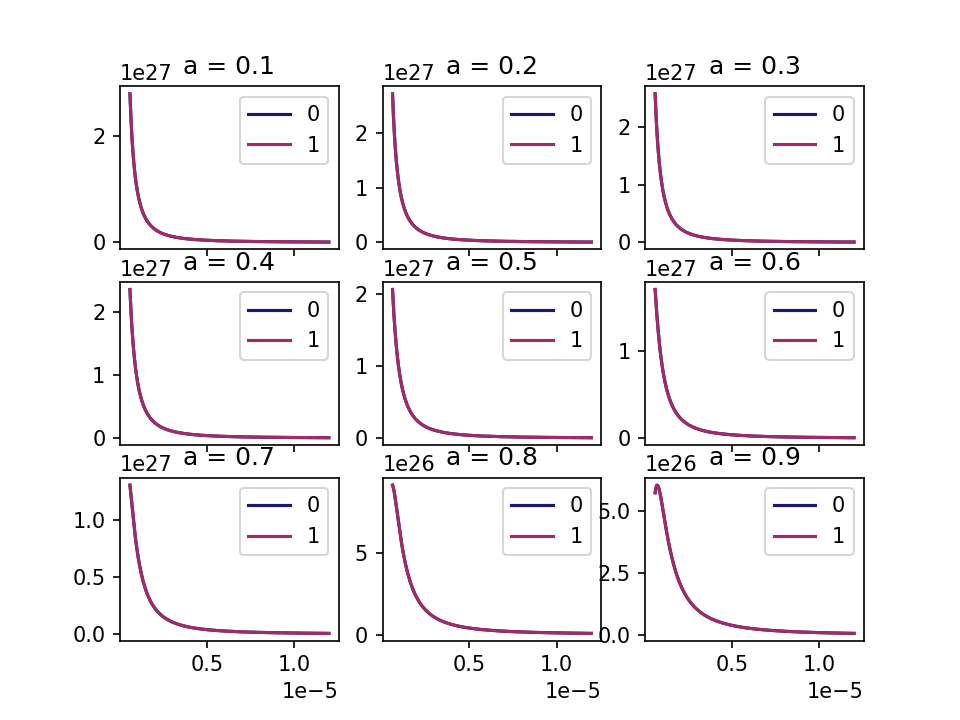

In [5]:
# Colapse
zzz = np.linspace(1.5*w, 30*w, 1000)
z_plot_0 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points,w,0,r1,r2)), dtype=float)
z_plot_1 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points,w,1,r1,r2)), dtype=float)

fig, ax = plt.subplots(nrows=3, ncols=3, sharex=True, dpi=150)
ax[0,0].plot(zzz, z_plot_0, label="0", color="#191970")
ax[0,0].plot(zzz, z_plot_1, label="1", color="#9F2B68")
ax[0,0].legend()
ax[0,0].set_title("a = 0.1")

ax[0,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*2,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[0,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*2,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[0,1].legend()
ax[0,1].set_title("a = 0.2")

ax[0,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*3,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[0,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*3,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[0,2].legend()
ax[0,2].set_title("a = 0.3")

ax[1,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*4,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*4,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,0].legend()
ax[1,0].set_title("a = 0.4")

ax[1,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*5,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*5,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,1].legend()
ax[1,1].set_title("a = 0.5")

ax[1,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*6,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1,2].legend()
ax[1,2].set_title("a = 0.6")

ax[2,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*7,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[2,0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*7,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[2,0].legend()
ax[2,0].set_title("a = 0.7")

ax[2,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*8,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[2,1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*8,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[2,1].legend()
ax[2,1].set_title("a = 0.8")

ax[2,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*9,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[2,2].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*9,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[2,2].legend()
ax[2,2].set_title("a = 0.9")
#plt.xlim([1530,1570])
#plt.ylim([-40,1])
plt.show()

| # de puntos | Distancia entre puntos| $R_{1}$ | $R_{2}$   |$\lambda$|
|:-----------:|:---------------------:|:-------:|:---------:|:-------:|
|:-----------:|:---------------------:|:-------:|:---------:|:-------:|
| 4           | 2                     | 5       | -5        |400      |
| 4           | 3                     | 5       | -5        |400      |
| 4           | 4                     | 5       | -5        |400      |
| 4           | 5                     | 5       | -5        |400      |
| 4           | 6                     | 5       | -5        |400      |
| 4           | 7.71                  | 5       | -5        |400      |

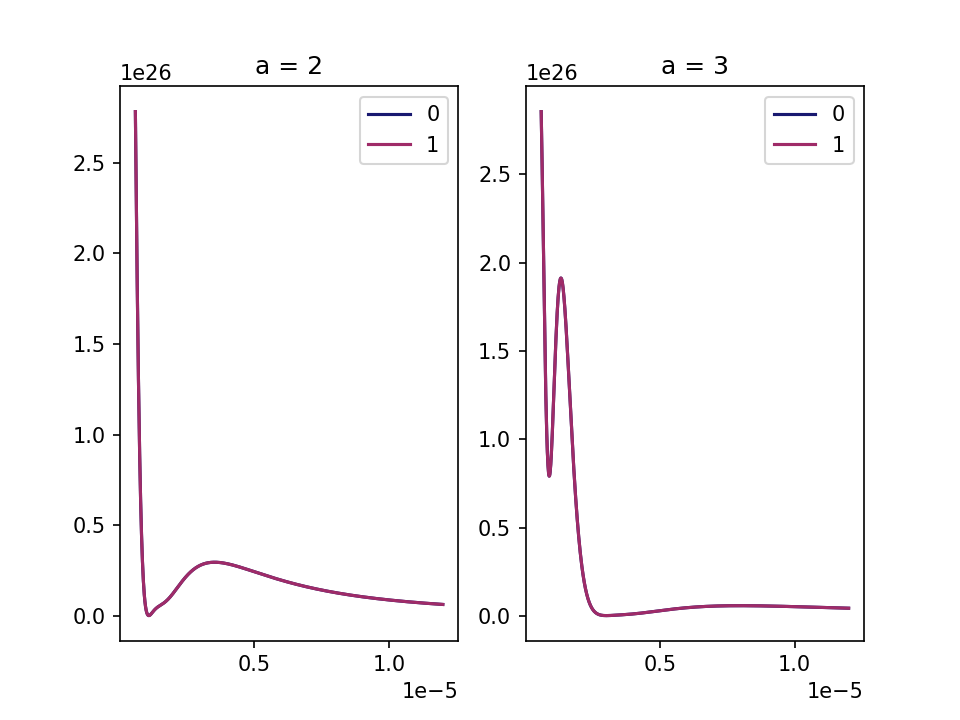

In [6]:
# Colapse
zzz = np.linspace(1.5*w, 30*w, 1000)
z_plot_0 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points,w,0,r1,r2)), dtype=float)
z_plot_1 = np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points,w,1,r1,r2)), dtype=float)

fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, dpi=150)
ax[0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*20,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[0].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*20,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[0].legend()
ax[0].set_title("a = 2")

ax[1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*30,w,0,r1,r2)), dtype=float), label="0", color="#191970")
ax[1].plot(zzz, np.array(list(GeometricPotencial_3D_reducido(0*w,0,zzz,points*30,w,1,r1,r2)), dtype=float), label="1", color="#9F2B68")
ax[1].legend()
ax[1].set_title("a = 3")

plt.show()

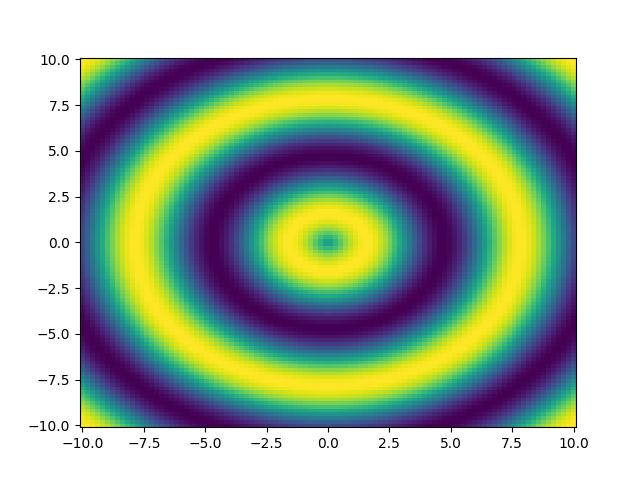

In [7]:
# Generar datos para la animación
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Crear la figura y el objeto de gráfico de malla de colores
fig, ax = plt.subplots()
pcm = ax.pcolormesh(X, Y, Z, cmap='viridis')

# Función para actualizar el gráfico en cada fotograma de la animación
def update(frame):
    # Actualizar los datos de la matriz z
    Z_new = np.sin(np.sqrt(X**2 + Y**2) + frame * 0.1)
    pcm.set_array(Z_new.ravel())
    return [pcm]

# Crear la animación
ani = FuncAnimation(fig, update, frames=range(50), blit=True)

# Mostrar la animación
plt.show()